# Project 1
Titile: Student Performance and Contributing Factors

Questions

1) How does the number of hours studied per week correlate with the final exam score?

2) Is there a significant relationship between class attendance percentage and exam scores?

3) Does the average number of sleep hours per night influence exam performance?

4) How does family income and parental education level impact the student's exam scores?

5) Do private school students perform better in exams than public school students?

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [20]:
print(len(df))

6607


In [21]:
df = df.drop_duplicates()
print(len(df))

6607


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [24]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [25]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [26]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [27]:
df=pd.read_csv("StudentPerformanceFactors.csv", usecols = ['Teacher_Quality','Parental_Education_Level','Distance_from_Home'])
df.head(34)

,Teacher_Quality,Parental_Education_Level,Distance_from_Home
0,Medium,High School,Near
1,Medium,College,Moderate
2,Medium,Postgraduate,Near
3,Medium,High School,Moderate
4,High,College,Near
5,Medium,Postgraduate,Near
6,Medium,High School,Moderate
7,High,High School,Far
8,Low,College,Near
9,High,High School,Moderate


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [30]:
#filling null values
df.fillna(method = "ffill",inplace = True)
print(df.shape)
df.isnull().sum()

(6607, 20)


<ipython-input-30-96aa2fab8c95>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = "ffill",inplace = True)


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [31]:
df.head(36)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


# 1)How does the number of hours studied per week correlate with the final exam score?

In [32]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


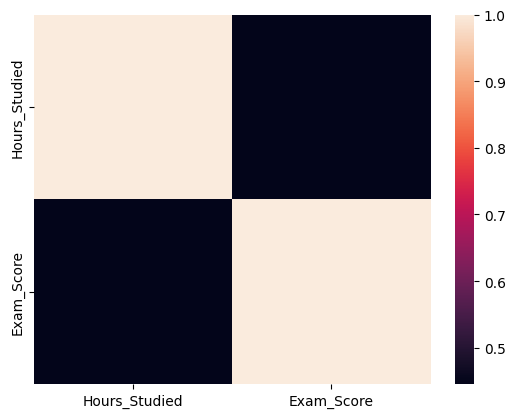

In [33]:
dataplot = sns.heatmap(df[['Hours_Studied','Exam_Score']].corr(numeric_only=True))
plt.show()

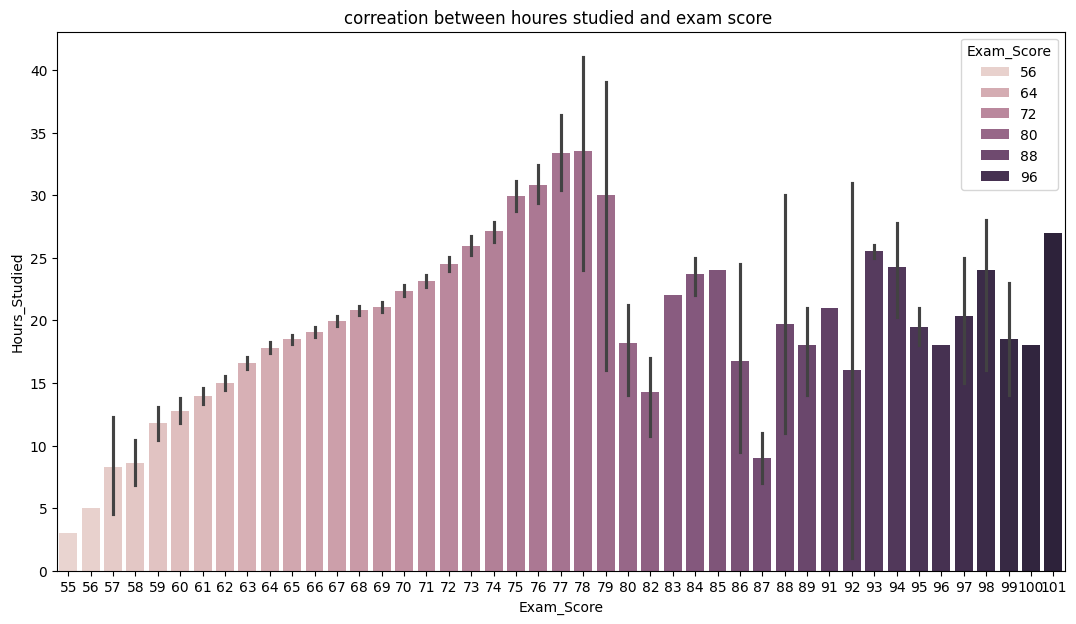

In [34]:
data = pd.read_csv("StudentPerformanceFactors.csv")
plt.figure(figsize=(13,7))
sns.barplot(data=data , x = "Exam_Score" , y = "Hours_Studied",hue="Exam_Score" )
plt.title("correation between houres studied and exam score ")
plt.show()

In [35]:
data = df[['Hours_Studied','Exam_Score']].corr()
data

,Hours_Studied,Exam_Score
Hours_Studied,1.000000,0.445455
Exam_Score,0.445455,1.000000


# 2) Is there a significant relationship between class attendance percentage and exam scores?

In [40]:
data = pd.read_csv("StudentPerformanceFactors.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [42]:
tend = data[['Attendance','Exam_Score','Gender']]
tend

,Attendance,Exam_Score,Gender
0,84,67,Male
1,64,61,Female
2,98,74,Male
3,89,71,Male
4,92,70,Female
...,...,...,...
6602,69,68,Female
6603,76,69,Female
6604,90,68,Female
6605,86,68,Female


In [43]:
tend1 = tend[['Attendance','Exam_Score']].corr()
tend1

,Attendance,Exam_Score
Attendance,1.000000,0.581072
Exam_Score,0.581072,1.000000


<Axes: >

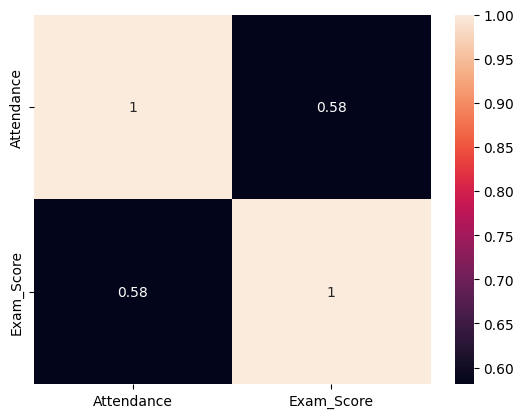

In [44]:
sns.heatmap(tend1,annot=True)

Text(0.5, 1.0, 'Attendance wise Marks')

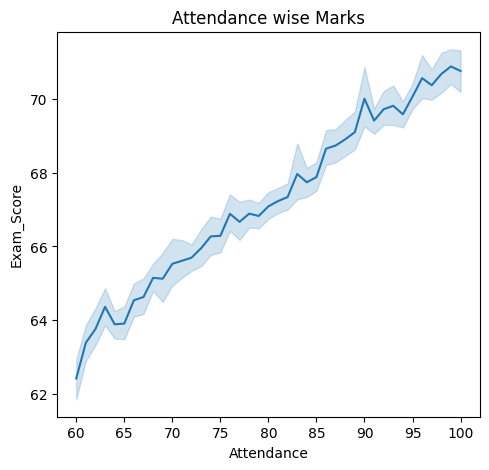

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.lineplot(data=tend,x='Attendance',y='Exam_Score')
plt.title("Attendance wise Marks")

Text(0.5, 1.0, 'Gender Attend the class wise Marks')

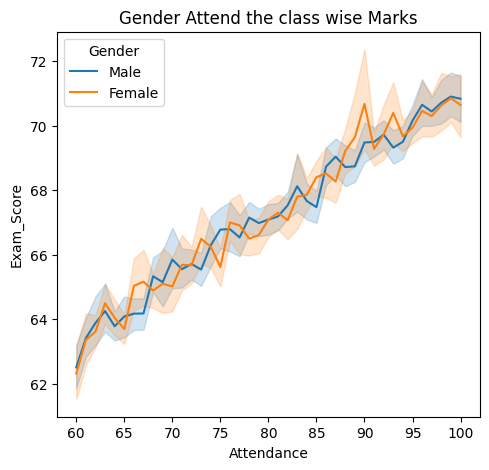

In [47]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
sns.lineplot(data=tend,x='Attendance',y='Exam_Score',hue='Gender')
plt.title("Gender Attend the class wise Marks")

# 3) Does the average number of sleep hours per night influence exam performance?

In [56]:
avg =data[['Sleep_Hours','Exam_Score']]
avg.head(3)

,Sleep_Hours,Exam_Score
0,7,67
1,8,61
2,7,74


In [68]:
avg1=avg[['Sleep_Hours','Exam_Score']].corr()
avg1

,Sleep_Hours,Exam_Score
Sleep_Hours,1.000000,-0.017022
Exam_Score,-0.017022,1.000000


<Axes: xlabel='Sleep_Hours', ylabel='Exam_Score'>

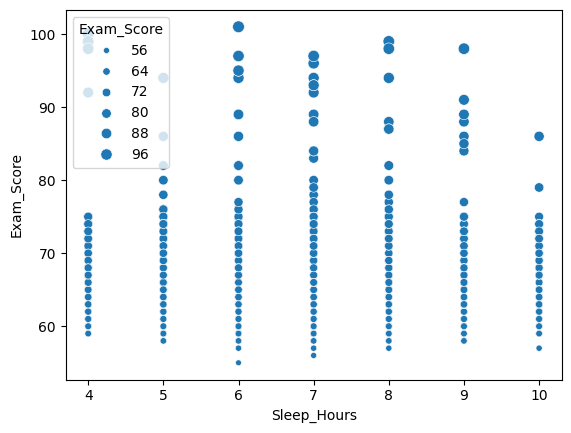

In [67]:
sns.scatterplot(data=avg,x='Sleep_Hours',y='Exam_Score',size='Exam_Score')

# 4) How does family income and parental education level impact the student's exam scores?

In [69]:
data = pd.read_csv("StudentPerformanceFactors.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [70]:
data1=data[['Family_Income','Parental_Education_Level','Exam_Score']]
data1.head()

,Family_Income,Parental_Education_Level,Exam_Score
0,Low,High School,67
1,Medium,College,61
2,Medium,Postgraduate,74
3,Medium,High School,71
4,Medium,College,70


Text(0.5, 1.0, 'Family Income will effect student marks or not')

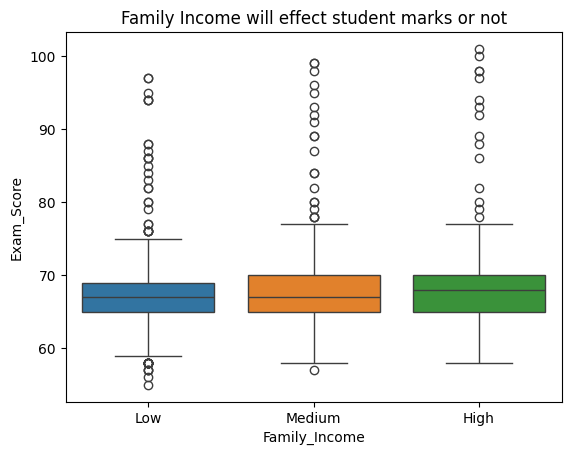

In [71]:
sns.boxplot(data=data1,x='Family_Income',y='Exam_Score',hue='Family_Income')
plt.title("Family Income will effect student marks or not")

In [72]:
data1.groupby(['Family_Income'])['Exam_Score'].mean()

,Exam_Score
Family_Income,
High,67.842396
Low,66.848428
Medium,67.334959


# 5) Do private school students perform better in exams than public school students?

In [73]:
data = pd.read_csv("StudentPerformanceFactors.csv")
data.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [74]:

school_type=data[['School_Type','Exam_Score']]
school_type

,School_Type,Exam_Score
0,Public,67
1,Public,61
2,Public,74
3,Public,71
4,Public,70
...,...,...
6602,Public,68
6603,Public,69
6604,Public,68
6605,Private,68


Text(0.5, 1.0, 'Which student is perform better in exam')

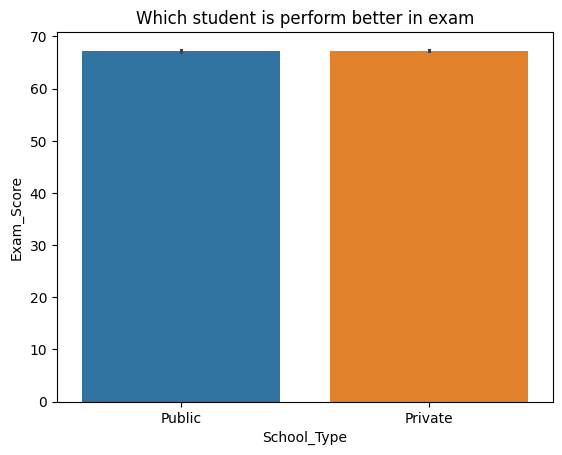

In [75]:
sns.barplot(data=school_type,x='School_Type',y='Exam_Score',hue='School_Type',orient='v')
plt.title("Which student is perform better in exam")

In [77]:
public=school_type[school_type['School_Type']=='Public']
print("public school type marks mean:",public['Exam_Score'].mean())

public school type marks mean: 67.21291866028709


In [78]:
private=school_type[school_type['School_Type']=='Private']
print("private school type marks mean:",public['Exam_Score'].mean())

private school type marks mean: 67.21291866028709


In [ ]:
# private school performing well then public.